# Modelo de Rede Neural Artificial para classificação de peças de roupa

### O seguinte projeto consiste na contrução de um modelo de RNA para a classificação de peças de roupa. 
### Este projeto faz parte do capítulo 13 do curso de Machine Learning da Data Science Academy.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
# exibindo versões dos pacotes importados
%reload_ext watermark
%watermark --iversions

tensorflow: 2.13.0
pandas    : 2.0.2
keras     : 2.13.1
matplotlib: 3.7.1
numpy     : 1.23.5



### Exibição e processamento dos dados

In [2]:
# Carregar dataset
# https://www.tensorflow.org/datasets/catalog/fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
# carregar dados de treino e de teste
(X_treino_full, y_treino_full), (X_teste, y_teste) = fashion_mnist.load_data()

In [3]:
# 60 mil imagens 28x28 pixels na escala de cinza com valores variando de 0 a 255 (int)
print(f"Dados de Treino: {X_treino_full.shape}")
# 10 mil imagens para teste
print(f"Dados de Teste: {X_teste.shape}")

Dados de Treino: (60000, 28, 28)
Dados de Teste: (10000, 28, 28)


In [4]:
# divisão dos dados em dados de treino e dados de validação
# Preparação dos dados - restrigindo valores ao intervalo entre [0,1]
X_valid, X_treino = X_treino_full[:5000] / 255., X_treino_full[5000:] / 255.
y_valid, y_treino = y_treino_full[:5000], y_treino_full[5000:]
X_teste = X_teste / 255.

print(f"Dados de Treino: {X_treino.shape[0]}")
print(f"Dados de Validação: {X_valid.shape[0]}")
print(f"Dados de Teste: {X_teste.shape[0]}")

Dados de Treino: 55000
Dados de Validação: 5000
Dados de Teste: 10000


In [5]:
# exibição da saida - inteiros em um intervalo de 0 a 9 - classes de roupas 
print("Exemplos de dados de saida:",end=" ")
print(*y_treino[:20],end=" ...")
# nome das classes correspondentes
nomes_classes = ["T-shirt/top", 
                 "Trouser", 
                 "Pullover", 
                 "Dress", 
                 "Coat", 
                 "Sandal", 
                 "Shirt", 
                 "Sneaker", 
                 "Bag", 
                 "Ankle boot"]

Exemplos de dados de saida: 4 0 7 9 9 9 4 4 3 4 0 1 8 6 3 6 4 3 2 8 ...

In [6]:
# neste projeto destinamos um diretório para salvar todos os plots gerados

# definindo diretório onde as imagens serão salvas
IMAGES_PATH = os.path.join(".", "dada")
os.makedirs(IMAGES_PATH, exist_ok = True)

# Função para salvar as imagens
def salva_imagem(fig_id, fig_extension = "png", resolution = 300):
    # caminho do diretório
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    # salvar plot
    plt.savefig(path, format = fig_extension, dpi = resolution)

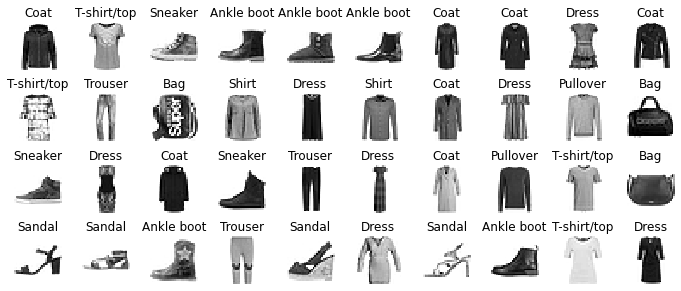

In [7]:
# Plot de algumas imagens

# número de linhas
n_rows = 4
# número de colunas
n_cols = 10
# ajuste de tamanho do plot
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        # plotagem
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_treino[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        # exibir label
        plt.title(nomes_classes[y_treino[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
# salvar imagem
salva_imagem('plot_fashion_mnist')
plt.show()

### Construção do modelo

In [8]:
# Modelo de Rede Neural com 2 Camadas Densas

# objeto do tipo sequência
modelo = keras.models.Sequential()
# Camada para receber os dados de entrada
modelo.add(keras.layers.Flatten(input_shape = [28, 28]))
# Primeira camada oculta com ativação relu
modelo.add(keras.layers.Dense(300, activation = "relu"))
# Segunda camada oculta com ativação relu
modelo.add(keras.layers.Dense(100, activation = "relu"))
# Camada de saída com ativação softmax
# Teremos uma probabilidade prevista para cada classe
modelo.add(keras.layers.Dense(10, activation = "softmax"))

# limpar a sessão Keras
keras.backend.clear_session()

In [9]:
# sumário do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


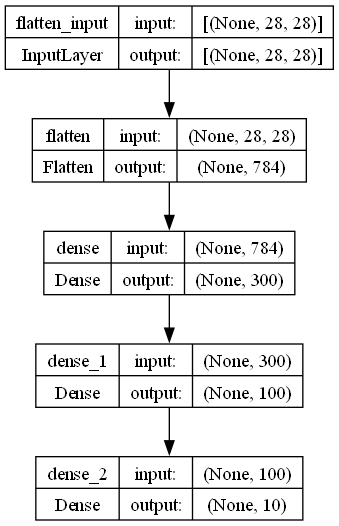

In [10]:
# plot com o modelo completo
keras.utils.plot_model(modelo, IMAGES_PATH + "/modelo_fashion_mnist.png", show_shapes = True)

In [11]:
# Vamos nomear a primeira camada oculta do modelo
hidden1 = modelo.layers[1]
# exibição dos pesos (gerados de forma aleatória) e vieses (zerados) da primeira camada oculta 
weights, biases = modelo.layers[1].get_weights()
print(weights)
print(biases)

[[-0.04139259  0.01573332  0.03983858 ...  0.03744129  0.0350353
   0.01204023]
 [ 0.07109646  0.00243702 -0.05185896 ... -0.00578268  0.03123267
  -0.02718817]
 [-0.06386614  0.01513922  0.02966445 ... -0.02869634  0.00195645
   0.00868497]
 ...
 [ 0.0093992  -0.06979418 -0.06709634 ...  0.05220833  0.04206202
   0.06536813]
 [-0.06774981  0.07066882 -0.011832   ... -0.04682664 -0.0727597
   0.04238684]
 [-0.04607603 -0.05991019  0.02905376 ... -0.06801204  0.05838184
   0.01325601]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [12]:
# otimizador, função de custo e a métrica
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
modelo.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [13]:
# Treinamento
start = time.time()
history = modelo.fit(X_treino, y_treino, epochs = 50, validation_data = (X_valid, y_valid))
end = time.time()

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7152 - accuracy: 0.7620 - val_loss: 0.6023 - val_accuracy: 0.7664
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4893 - accuracy: 0.8303 - val_loss: 0.4557 - val_accuracy: 0.8386
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4454 - accuracy: 0.8437 - val_loss: 0.4398 - val_accuracy: 0.8456
Epoch 4/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4160 - accuracy: 0.8534 - val_loss: 0.3950 - val_accuracy: 0.8642
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3970 - accuracy: 0.8602 - val_loss: 0.3825 - val_accuracy: 0.8644
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8655 - val_loss: 0.3862 - val_accuracy: 0.8644
Epoch 7/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3671 - accuracy: 0.8695 - val_loss: 0.3839 - val_accuracy:

In [14]:
t = int(end - start)
m_min = t//60
m_sec = t - m_min*60
print(f"Tempo de treinamento do modelo: {m_min} minutos e {m_sec} segundos")

Tempo de treinamento do modelo: 3 minutos e 31 segundos


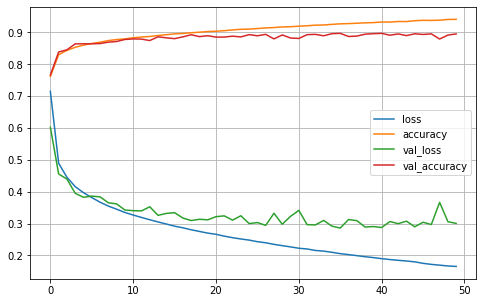

In [15]:
# plotagem do histórico de treinamento
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)

# salvar imagem
salva_imagem("plot_keras_learning_curves")
# exibição
plt.show()

In [16]:
# Avaliação do modelo
eva = modelo.evaluate(X_teste, y_teste)
print(f"Custo: {eva[0]}")
print(f"Acurácia: {eva[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3300 - accuracy: 0.8869
Custo: 0.3300279676914215
Acurácia: 0.886900007724762


1/1 [==============================] - 0s 126ms/step


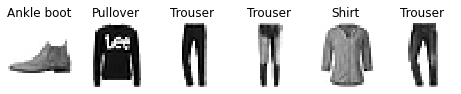

In [21]:
# teste do modelo

# coleta de 6 exemplos dos dados de teste
X_new = X_teste[:6]
# previsão - predict entrega a probabilidade de cada classe então é considerada a classe com maior probabilidade
y_pred = modelo.predict(X_new).argmax(axis=1)

# Plot
plt.figure(figsize = (8, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap = "binary", interpolation = "nearest")
    plt.axis('off')
    plt.title(nomes_classes[y_teste[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
salva_imagem('plot_previsoes_fashion_mnist_images')
plt.show()